In [8]:
%matplotlib inline

import datajoint as dj
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style('ticks')

import os
import sys
import inspect

p = !pwd
p = os.path.dirname(os.path.dirname(p[0]))
if p not in sys.path:
    sys.path.append(p)

In [2]:
from cnn_sys_ident.mesonet.data import MultiDataset
from cnn_sys_ident.mesonet.parameters import Core, Readout, Model, RegPath, Fit
from cnn_sys_ident.mesonet import MODELS

Connecting aecker@52.202.15.166:3306


In [3]:
data_key = {'data_hash': 'cfcd208495d565ef66e7dff9f98764da'}
dataset = MultiDataset() & data_key

# Load a model

In [4]:
num_filters = 16
model_rel = MODELS['HermiteSparse'] * dataset \
    & 'positive_feature_weights=False AND shared_biases=False' \
    & {'num_filters_2': num_filters}
key = (Fit() * model_rel).fetch(dj.key, order_by='val_loss', limit=2)[1]
num_rotations = (model_rel & key).fetch1('num_rotations')
model = Fit().load_model(key)

INFO:tensorflow:Restoring parameters from /gpfs01/bethge/home/aecker/lab/projects/microns/cnn-sys-ident/checkpoints/aecker_mesonet_data/8c83bd2e8a8ea1b4f79c99edeabc3476/model.ckpt


### Find approximate receptive field locations

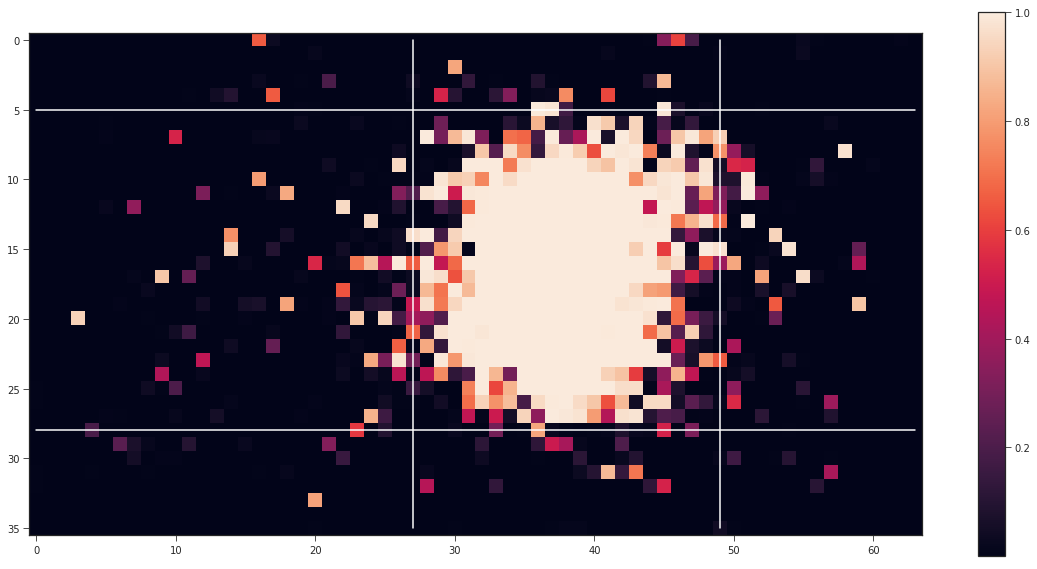

In [21]:
masks = model.base.evaluate(model.readout.masks)
k = 50
m = np.exp(k*masks) / np.sum(np.exp(k*masks), axis=(1,2), keepdims=True)

ny, nx = m.shape[1:]
x = [27, 49]
y = [5, 28]
plt.figure(figsize=(20, 10))
plt.imshow(m.max(axis=0))
plt.plot([x[0], x[0]], [0, ny-1], 'w')
plt.plot([x[1], x[1]], [0, ny-1], 'w')
plt.plot([0, nx-1], [y[0], y[0]], 'w')
plt.plot([0, nx-1], [y[1], y[1]], 'w')
plt.colorbar()
plt.show()